In [1]:
import matplotlib.pyplot as plt
from scipy.signal import lti, step2
import numpy as np

### Example problem
Suppose we have a simple mass-spring-damper system.    
![title](images/mass_spring_damper.png)    
The governing equation of this system is     
$m\ddot x + b\dot x + kx = F$     
Taking the Laplace transform of the governing equation, we get    
$m{s^2}X\left( s \right) + bsX\left( s \right) + kX\left( s \right) = F\left( s \right)$     

Then, the transfer function between the input force $F(s)$ and the output displacement $X(s)$ then becomes 

\begin{equation*}
\frac{X(s)}{F(s)} = \frac{1}{ms^2 + bs + k}
\end{equation*}

Let      
m = 1 kg     
b = 10 N s/m     
k = 20 N/m     
F = 1 N     
    
Substituting these values into the above transfer function   

\begin{equation*}
\frac{X(s)}{F(s)} = \frac{1}{s^2 + 10s + 20}
\end{equation*}

In [2]:
sys = lti([1], [1, 10, 20])

In [3]:
t, y = step2(sys)

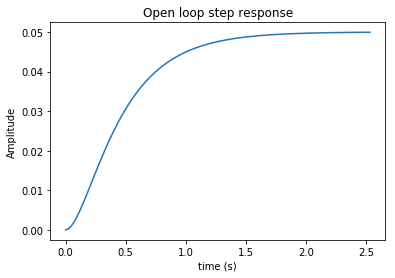

In [4]:
plt.xlabel('time (s)')
plt.ylabel('Amplitude')
plt.title('Open loop step response')
plt.plot(t, y)

### Proportional Control (P)

\begin{equation*}
T(s) = \frac{X(s)}{R(s)} = \frac{K_p}{s^2 + 10s + (20 + K_p)}
\end{equation*}
Let the proportional gain ($K_p$) equal 10, 100, 200, 300

In [5]:
P_10 = lti([10], [1, 10, 30])
P_100 = lti([100], [1, 10, 120])
P_200 = lti([200], [1, 10, 220])
P_300 = lti([300], [1, 10, 320])

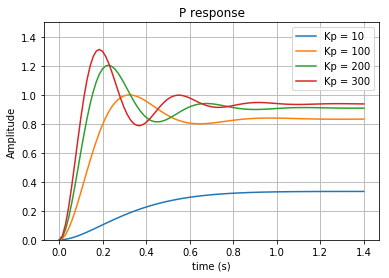

In [6]:
t, y = step2(P_10)
plt.plot(t, y, label = "Kp = 10")
t, y = step2(P_100)
plt.plot(t, y, label = "Kp = 100")
t, y = step2(P_200)
plt.plot(t, y, label = "Kp = 200")
t, y = step2(P_300)
plt.plot(t, y, label = "Kp = 300")
plt.xlabel('time (s)')
plt.ylabel('Amplitude')
plt.title('P response')
plt.legend(loc='upper right')
plt.ylim(0, 1.5)
plt.grid(True)

##### Conclusion
* Increasing $K_p$ will reduce the steady state error.
* Increasing $K_p$ reduces the rise time.
* After certain limit increasing $K_p$ only causes overshoot.

### Proportional-Derivative Control (PD)

\begin{equation*}
T(s) = \frac{X(s)}{R(s)} = \frac{K_d s + K_p}{s^2 + (10 + K_d) s + (20 + K_p)}
\end{equation*}
Let $K_p$ equal 300 as before and let $K_d$ equal 10.

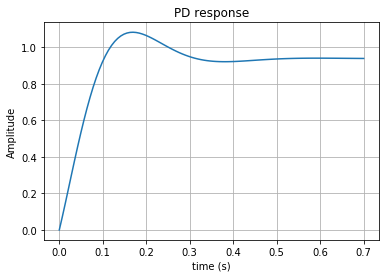

In [7]:
PD = lti([10, 300], [1, 20, 320])
t, y = step2(PD)
plt.xlabel('time (s)')
plt.ylabel('Amplitude')
plt.title('PD response')
plt.grid(True)
plt.plot(t, y)

### Proportional-Integral (PI)

\begin{equation*}
T(s) = \frac{X(s)}{R(s)} = \frac{K_p s + K_i}{s^3 + 10 s^2 + (20 + K_p )s + K_i}
\end{equation*}
Let's reduce $K_p$ to 200, and let $K_i$ equal 100, 200, 300.

In [8]:
PI_100 = lti([200, 100], [1, 10, 220, 100])
PI_200 = lti([200, 200], [1, 10, 220, 200])
PI_300 = lti([200, 300], [1, 10, 220, 300])

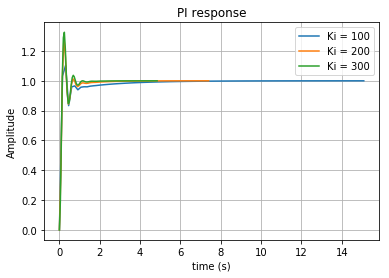

In [9]:
t, y = step2(PI_100)
plt.plot(t, y, label = "Ki = 100")
t, y = step2(PI_200)
plt.plot(t, y, label = "Ki = 200")
t, y = step2(PI_300)
plt.plot(t, y, label = "Ki = 300")
plt.xlabel('time (s)')
plt.ylabel('Amplitude')
plt.title('PI response')
plt.grid(True)
plt.legend(loc='upper right')

##### Conclusion:
* Integral control eliminates the steady state error.
* Increasing $K_i$ reduces the rise time a little.
* After certain limit, increasing $K_i$ will only increase overshoot.

### Proportional-Integral-Derivative Control (PID)

\begin{equation*}
T(s) = \frac{X(s)}{R(s)} = \frac{K_d s^2 + K_p s + K_i}{s^3 + (10 + K_d)s^2 + (20 + K_p)s + K_i }
\end{equation*}
After several iterations of tuning, the gains $K_p$ = 350, $K_i$ = 300, and $K_d$ = 10, 30, 50 provided the desired response

In [10]:
PID_10 = lti([10, 350, 300], [1, 20, 370, 300])
PID_30 = lti([30, 350, 300], [1, 40, 370, 300])
PID_50 = lti([50, 350, 300], [1, 60, 370, 300])

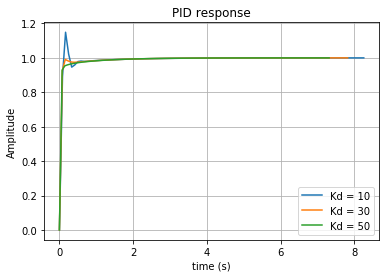

In [11]:
t, y = step2(PID_10)
plt.plot(t, y, label = "Kd = 10")
t, y = step2(PID_30)
plt.plot(t, y, label = "Kd = 30")
t, y = step2(PID_50)
plt.plot(t, y, label = "Kd = 50")
plt.xlabel('time (s)')
plt.ylabel('Amplitude')
plt.title('PID response')
plt.grid(True)
plt.legend(loc='lower right')

##### Conclusion:
* Increasing $K_d$ decreases the overshoot.
* Increasing $K_d$ reduces the settling time.